In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from keras.datasets import mnist

# 1- Load MNIST Dataset From Sklearn

In [2]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [3]:
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [4]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
x_train.shape

(60000, 28, 28)

# 2- Subset Data to Only Class 0 and Class 1

In [6]:
# we create a boolean mask using the logical_or function, and use it to subset the arrays. 
# Note that we use the bitwise | operator instead of the logical or operator 
#(| and & perform element-wise operations), and use parentheses to group the conditions.

mask = np.logical_or(y_train == 0, y_train == 1)

# Use the mask to subset the arrays
x_train_ = x_train[mask]
y_train_ = y_train[mask]
x_test_ = x_test[(y_test == 0) | (y_test == 1)]
y_test_ = y_test[(y_test == 0) | (y_test == 1)]

In [7]:
x_train_.shape

(12665, 28, 28)

In [8]:
y_train_.shape

(12665,)

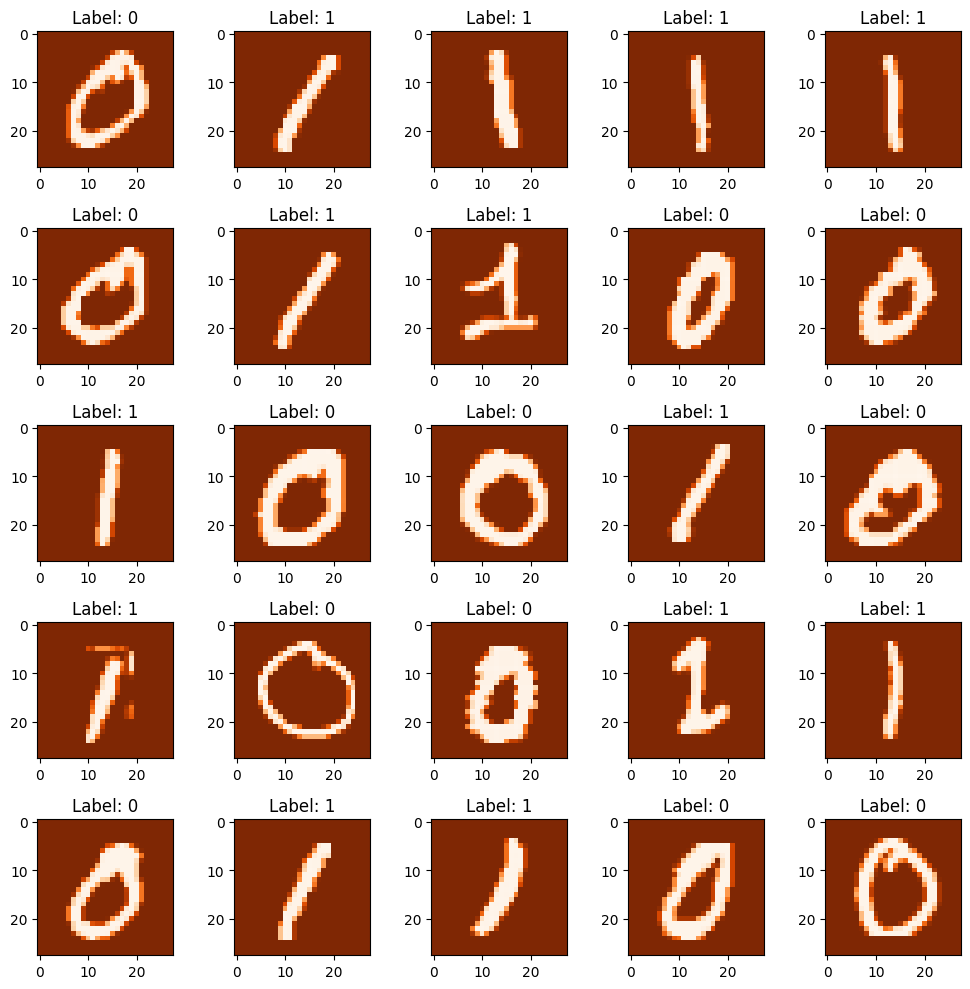

In [9]:
#Plot Figure
fig, axes = plt.subplots(nrows = 5 , ncols = 5 , figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
        ax.imshow(x_train_[i], cmap='Oranges_r')
        ax.set_title(f"Label: {y_train_[i]}")
plt.tight_layout()
plt.show()

# 3- Standardization of dataset

In [10]:
# Reshape X_train to use it as 2D not 3D
x_train_ = x_train_.reshape(x_train_.shape[0] , -1)
# Reshape X_test
x_test_ = x_test.reshape(x_test.shape[0] , -1)

In [11]:
x_train_.shape

(12665, 784)

In [12]:
x_test_.shape

(10000, 784)

In [13]:
y_train_.shape

(12665,)

In [14]:
def Standardization(xtrain, xtest):
  # Standardization for x_train
  xtrain = (xtrain - xtrain.mean()) / xtrain.std()
  # Standardization for x_test
  xtest = (xtest - xtest.mean()) / xtest.std()
  return xtrain , xtest

# 4- Implementation of Logistic Regression

In [15]:
def sigmoid(z) :
  return 1 / (1 + np.exp(-z))

In [16]:
def LogistcRegression(x , y , alpha , iterations) :
  
  n = x.shape
  weight = np.random.rand(n[1])
  bias = 0
  m = x.shape
  cost = []
  tol = 0.0000000001

  for i in range(iterations) :
    z = np.dot(weight , x.T) + bias
    yhat = sigmoid(z)

    cost.append(np.mean(((-y*np.log(yhat))-(((1-y)*(np.log(1-yhat)))))))
    
    d_w = np.dot (((yhat - y).T) , x) / m[0]
    d_b = np.mean(yhat - y)

    if cost[i] <= tol:
      break 

    weight -= alpha * d_w
    bias -= alpha * d_b


  return weight , bias

In [17]:
w , b = LogistcRegression(x_train_ , y_train_ , 0.001 , 100)

<ipython-input-16-6000d8b6fc9d>:14: RuntimeWarning: divide by zero encountered in log
  cost.append(np.mean(((-y*np.log(yhat))-(((1-y)*(np.log(1-yhat)))))))
<ipython-input-16-6000d8b6fc9d>:14: RuntimeWarning: invalid value encountered in multiply
  cost.append(np.mean(((-y*np.log(yhat))-(((1-y)*(np.log(1-yhat)))))))
<ipython-input-15-3cc3dcfecae8>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


In [18]:
np.unique(w)

array([-7.94590891e-01, -7.87655144e-01, -7.84327680e-01, -7.83943822e-01,
       -7.64960221e-01, -7.62778700e-01, -7.44391944e-01, -7.15192568e-01,
       -7.13441968e-01, -6.94761103e-01, -6.85707691e-01, -6.78528813e-01,
       -6.77129363e-01, -6.70007096e-01, -6.69339661e-01, -6.62480492e-01,
       -6.46899141e-01, -6.27297706e-01, -6.13060533e-01, -6.08760175e-01,
       -5.99938323e-01, -5.99076117e-01, -5.88577967e-01, -5.83922921e-01,
       -5.72334814e-01, -5.70692674e-01, -5.65226683e-01, -5.56391675e-01,
       -5.50075785e-01, -5.42362286e-01, -5.15320518e-01, -5.15155358e-01,
       -5.00865091e-01, -4.60714910e-01, -4.53323588e-01, -4.40791801e-01,
       -4.35602364e-01, -4.35206500e-01, -4.30780954e-01, -4.29332097e-01,
       -4.26471434e-01, -4.23539262e-01, -4.16376468e-01, -4.13748306e-01,
       -4.10766222e-01, -4.05170541e-01, -4.02591320e-01, -4.00288776e-01,
       -3.99332568e-01, -3.99287084e-01, -3.97794280e-01, -3.95182690e-01,
       -3.93928046e-01, -

In [23]:
def predict(x, weight, bias):
  sigmoidResult = sigmoid(x.dot(weight) + bias)
  return np.where(sigmoidResult >= 0.5, 1, 0).flatten()

In [26]:
p = predict(x_train_ , w , b)
p

<ipython-input-15-3cc3dcfecae8>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


array([0, 1, 1, ..., 1, 0, 1])

In [27]:
def accuracy(predicted, y):
    return (np.sum(predicted == y) / len(y)) * 100

In [28]:
accu = accuracy(p , y_train_)

In [29]:
accu

99.17883932096329

# 5- Divide data into training and validation set using 10-fold cross validation method

In [30]:
def kfold_cross_validation(x, y, k):
    n_samples = x.shape[0]
    fold_size = n_samples // k
    accuracy_values = []

    learning_rates = [0.0001 , 0.001]
    indices = np.arange(n_samples)
    np.random.shuffle(indices)

    for fold in range(k):
        start = fold * fold_size
        end = (fold + 1) * fold_size
        val_indices = indices[start:end]
        train_indices = np.concatenate([indices[:start], indices[end:]])
        x_traini = x[train_indices].copy()
        y_traini = y[train_indices].copy()
        x_val = x[val_indices]
        y_val = y[val_indices]
        #print(x_traini.shape)
        #print(y_traini.shape)
        #print(x_val.shape)
        #print(y_val.shape)
        accuracy_rate = []
        for alpha in learning_rates:
            w , b = LogistcRegression(x_traini, y_traini, alpha, 1000)    
            accuracy_rate.append(round(accuracy(p ,y), 2))
            #print("Sahora")
        accuracy_values.append(np.mean(accuracy_rate))
        #print("Sahar")
    result = np.argmax(accuracy_values)
    best_alpha = learning_rates[result]
    best_accuracy = round(accuracy_values[result], 2)
    return best_accuracy, best_alpha

In [31]:
accu , alpha = kfold_cross_validation(x_train_ , y_train_ , 10)

<ipython-input-16-6000d8b6fc9d>:14: RuntimeWarning: divide by zero encountered in log
  cost.append(np.mean(((-y*np.log(yhat))-(((1-y)*(np.log(1-yhat)))))))
<ipython-input-16-6000d8b6fc9d>:14: RuntimeWarning: invalid value encountered in multiply
  cost.append(np.mean(((-y*np.log(yhat))-(((1-y)*(np.log(1-yhat)))))))
<ipython-input-15-3cc3dcfecae8>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


In [32]:
print("The Best Accuracy is :" , accu , "With Learning Rate :" , alpha )

The Best Accuracy is : 99.18 With Learning Rate : 0.0001
